<br>
<br>
<font size='6'><u><b>Gravitational Lensing</b></u></font>
<br>

##### Written by A. Bolton, 2017
##### Updated 2018: Elliot Kisiel and Connie Walker
##### Revised by Andres Jaramillo

You have learned about how we can measure the mass of a galaxy based on the gravitational lensing of a foreground galaxy. This lensing effect can be seen in the various images below. In this activity, we will be walking through some of the steps that astronomers use to determine the mass of a galaxy by examining the lensing effects.

<img src='Figures/SloanLensACS_Survey.png' width='900'>

___

# Table of Contents

* [How to Use This Notebook](#How-to-Use-This-Notebook)
* [Pre-Activity Setup](#Pre-Activity-Setup)
* [Activity 1: The Lensed Galaxy](#Activity-1:-The-Lensed-Galaxy)
* [Activity 2: The Lensing Galaxy](#Activity-2:-The-Lensing-Galaxy)
* [Activity 3: The Lensed and Lensing Galaxies](#Activity-3:-The-Lensed-and-Lensing-Galaxies)
    * [Part 3.1: Matching the Galaxy](#Part-3.1:-Matching-the-Galaxy)
    * [Part 3.2: Real Lensed Galaxies](#Part-3.2:-Real-Lensed-Galaxies)
    * [Part 3.3: Relation to the Mass of Galaxies](#Part-3.3:-Relation-to-the-Mass-of-Galaxies)
___

# How to Use This Notebook

The webpage you are in is actually an app - much like the ones on your cellphone. This app consists of cells.

An *input* cell looks like a light grey box with an `In [ ]:` on its left. Input cells each contain code - instructions to make the computer do something.

To activate or select a cell, click anywhere inside of it.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents.</b></font>
</div>

In [ ]:
# Text that follows a "#" is known as a comment.
# Comments do not affect your code in any way.
# You should always read the comments at the top of each cell you interact with.
# Comments will be used to describe what the cell's code is actually doing.

To execute or run a selected cell, hit `[Shift + Enter]` on your keyboard.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents. Then, run the cell.</b></font>
</div>

In [1]:
# Text that DOESN'T follow a "#" is considered code.
# Lines of code are instructions given to your computer.
# The line of code below is a "print" statement.
# A print statement literally prints out the text between its quotes.

print("Congrats! You have successfully run your first cell!")

Congrats! You have successfully run your first cell!


Running a cell creates an *output* directly below it. An output can be some text, a graph, an interactive slider, or even nothing at all! For that last case, you know you have run a cell when the `In [ ]:` becomes `In [#]:`, where "#" is any number.

You can learn more about how Jupyter notebooks work at https://try.jupyter.org/
___

# Pre-Activity Setup

In order for any of the activities to work properly, you must import the libraries needed for the code in this notebook.

<div class='alert alert-info'>
    <font size='3'><b>Select and run the cell below.</b></font>
</div>

In [ ]:
# If you are running the notebook in Colab, this package needs to be installed first.
!pip install ipympl &> /dev/null

In [1]:
#Now we import some needed packages from our repository

repoURL = 'https://raw.githubusercontent.com/DavidVargasMora/TACTests/master/'

from httpimport import remote_repo

with remote_repo(['lensdemo_funcs'], repoURL+'05_Gravitational_Lensing') :
    import lensdemo_funcs as ldf

In [2]:
# Import necessary modules.
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib import cm
#import lensdemo_funcs as ldf
from ipywidgets import *

### Programming Side Note

The previous cell is a way of importing the necessary functions and other stuff to allow us to make pictures and do math super easy. In the next cell, we will be using a dictionary to easily group things together. Like how in a normal dictionary there is a word and a definition, this dictionary acts in a similar manner but instead of a word, we call it a key and instead of a definition we call it a value.

```python
dictionary = {key1 : value1, key2 : value2 ...}
```

In [3]:
# Package some image display preferences in a "dictionary object", for use below:
myargs = {'interpolation': 'nearest', 'origin': 'lower', 'cmap': cm.nipy_spectral}
# The following specifies an alternate color map, which some may find preferable.
# Un-comment and execute the following line if you want to use it:
# myargs = {'interpolation': 'nearest', 'origin': 'lower', 'cmap': cm.hot}

___

# Activity 1: The Lensed Galaxy

In this exercise you will be playing around with the different parameters of a distant galaxy; we will name this galaxy Pat. This will be the galaxy that will eventually be lensed. What would you expect a very distant galaxy to look like? Would it be shaped like a spiral? A point? Some sort of smear? Think about this and then discuss with a person near you.

Once you have thought about that, we will start to set up some of the parameters below to get an image of what Pat is going to look like. First, run the program as it is set up. Then, use the sliders to tweak the parameters until Pat looks how you want it. Our recommendation is to tweak one parameter (e.g. `g_sig`, `g_amp`, `g_axrat`, etc.) at a time to see how that parameter changes Pat. Try this a few times. Talk to the person next to you and describe one or two ways in which Pat looks different.

```python
gpar = [g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa]
```

Where the parameters are defined as:

>`g_amp` is the peak brightness value.  
>`g_sig` is how spread out Pat is.  
>`g_xcen` is the x position of the center of Pat.  
>`g_ycen` is the y position of the center of Pat.  
>`g_axrat` is the minor-to-major axis ratio.  
>`g_pa` is the major-axis position angle [degrees] c.c.w. from x axis.

Each of the parameters has the recommended ranges in values below:

>$0 \le$ `g_amp` $\le 10$  
>$0 \le$ `g_sig` $\le 0.5$  
>$-1 \le$ `g_xcen` $\le 1$  
>$-1 \le$ `g_ycen` $\le 1$  
>$0.01 \le$ `g_axrat` $\le 1$  
>$0 \le$ `g_pa` $\le 180$

<div class='alert alert-info'>
    <h3 class='alert-heading'>Helpful Reminder(s)</h3>
    <ul>
        <li>Click anywhere inside of a cell to select it.</li>
        <li>Hit [Shift + Enter] to run a selected cell.</li>
    </ul>
</div>

Box(children=(FloatSlider(value=5.0, continuous_update=False, description='g_amp', layout=Layout(width='initia…

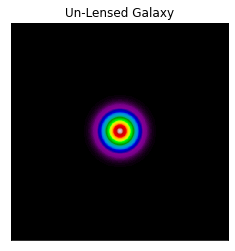

In [4]:
# Set some parameters to make x and y coordinate images.
nx = 501
ny = 501
xhilo = [-2.5, 2.5]
yhilo = [-2.5, 2.5]
x = (xhilo[1] - xhilo[0]) * np.outer(np.ones(ny), np.arange(nx)) / float(nx-1) + xhilo[0]
y = (yhilo[1] - yhilo[0]) * np.outer(np.arange(ny), np.ones(nx)) / float(ny-1) + yhilo[0]

# Set some Pat image parameters and pack them into an array.
g_amp = 5  # Peak brightness value
g_sig = 0.25  # How spread out Pat is
g_xcen = 0  # x position of center
g_ycen = 0  # y position of center
g_axrat = 1  # Minor-to-major axis ratio
g_pa = 0  # Major-axis position angle [degrees] c.c.w. from x axis
gpar = np.asarray([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa])
g_image = ldf.gauss_2d(x, y, gpar)

# Have a look at the un-lensed Pat.

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Un-Lensed Galaxy')
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(g_image, **myargs)

 # Create the interactive widget.
def f(g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa):
    gpar = np.asarray([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa])
    g_image = ldf.gauss_2d(x, y, gpar)
    plt.imshow(g_image, **myargs)

layout = {'width':'initial'}
box_layout = {'display':'flex', 'flex_flow':'column', 'border':'5px solid grey', 'width':'initial'}
g_amp = FloatSlider(value=5, min=0, max=10, step=0.01, continuous_update=False, layout=layout)
g_sig = FloatSlider(value=0.25, min=0, max=0.5, step=0.01, continuous_update=False, layout=layout)
g_xcen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
g_ycen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
g_axrat = FloatSlider(value=1, min=0.01, max=1, step=0.01, continuous_update=False, layout=layout)
g_pa = FloatSlider(value=0, min=0, max=180, step=0.01, continuous_update=False, layout=layout)
interactive(f, g_amp=g_amp, g_sig=g_sig, g_xcen=g_xcen, g_ycen=g_ycen, g_axrat=g_axrat, g_pa=g_pa)
Box([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa], layout=box_layout)

___

# Activity 2: The Lensing Galaxy

Now that we have Pat, it is time to add a very massive, closer galaxy; we will name this one Chris. Scientists call Chris the lensing galaxy and Pat the lensed galaxy. The most important parameter for Chris is the Einstein radius. Knowing this parameter allows scientists to predict the mass of Chris, the lensing galaxy. We will be using Pat as our distant galaxy and tweak the parameters of Chris to see how each of the parameters changes what Pat looks like to us. First, run the program as it is set up. Then, use the sliders to tweak one parameter (e.g. `l_amp`, `l_axrat`, etc.) at a time to see how that parameter changes Pat. Try this a few times. Talk to the person next to you and describe one or two ways in which Pat looks different.

```python
lpar = [l_amp, l_xcen, l_ycen, l_axrat, l_pa]
```

Where the parameters are defined as:

>`l_amp` is the Einstein radius of Chris.  
>`l_xcen` is the x position of the center of Chris.  
>`l_ycen` is the y position of the center of Chris.  
>`l_axrat` is the minor-to-major axis ratio.  
>`l_pa` is the major-axis position angle [degrees] c.c.w. from x axis.

Each of the parameters has the recommended ranges in values below:

>$0 \le$ `l_amp` $\le 2$  
>$-1 \le$ `l_xcen` $\le 1$  
>$-1 \le$ `l_ycen` $\le 1$  
>$0.01 \le$ `l_axrat` $\le 1$  
>$0 \le$ `l_pa` $\le 180$

<div class='alert alert-info'>
    <h3 class='alert-heading'>Helpful Reminder(s)</h3>
    <ul>
        <li>Click anywhere inside of a cell to select it.</li>
        <li>Hit [Shift + Enter] to run a selected cell.</li>
    </ul>
</div>

In [4]:
# Set some lens-model parameters and pack them into an array.
l_amp = 1  # Einstein radius
l_xcen = 0  # x position of center
l_ycen = 0  # y position of center
l_axrat = 1  # Minor-to-major axis ratio
l_pa = 0  # Major-axis position angle [degrees] c.c.w. from x axis
lpar = np.asarray([l_amp, l_xcen, l_ycen, l_axrat, l_pa])
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)

# Have a look at the lensed Pat.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Lensed Galaxy')
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(g_lensimage, **myargs)

# Create the interactive widget.
def f(l_amp, l_xcen, l_ycen, l_axrat, l_pa):
    lpar = np.asarray([l_amp, l_xcen, l_ycen, l_axrat, l_pa])
    (xg, yg) = ldf.sie_grad(x, y, lpar)
    g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
    plt.imshow(g_lensimage, **myargs)

l_amp = FloatSlider(value=1, min=0, max=2, step=0.01, continuous_update=False, layout=layout)
l_xcen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
l_ycen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
l_axrat = FloatSlider(value=1, min=0.01, max=1, step=0.01, continuous_update=False, layout=layout)
l_pa = FloatSlider(value=0, min=0, max=180, step=0.01, continuous_update=False, layout=layout)
interactive(f, l_amp=l_amp, l_xcen=l_xcen, l_ycen=l_ycen, l_axrat=l_axrat, l_pa=l_pa)
Box([l_amp, l_xcen, l_ycen, l_axrat, l_pa], layout=box_layout)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Box(children=(FloatSlider(value=1.0, continuous_update=False, description='l_amp', layout=Layout(width='initia…

___

# Activity 3: The Lensed and Lensing Galaxies

Now that we have tweaked the parameters for both Pat and Chris individually, what happens if we change the parameters of both at the same time? In the following cells, the left image is Pat before it is lensed and the right image is Pat after its light has been bent by Chris and therefore lensed. **It is important to note here that we are not displaying Chris.**

<img src="Figures/Lensed_Galaxy_Components_v2.png" width="800">

___

## Part 3.1: Matching the Galaxy

You should have been given a random number at the start of this activity. If you do not, raise your hand now. Using the sliders below, try to reproduce the image corresponding to the number recieved.

For your convenience, the parameters are defined again below:

```python
gpar = [g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa]
```

Where the parameters are defined as:

>`g_amp` is the peak brightness value.  
>`g_sig` is how spread out Pat is.  
>`g_xcen` is the x position of the center of Pat.  
>`g_ycen` is the y position of the center of Pat.  
>`g_axrat` is the minor-to-major axis ratio.  
>`g_pa` is the major-axis position angle [degrees] c.c.w. from x axis.

```python
lpar = [l_amp, l_xcen, l_ycen, l_axrat, l_pa]
```

Where the parameters are defined as:

>`l_amp` is the Einstein radius of Chris.  
>`l_xcen` is the x position of the center of Chris.  
>`l_ycen` is the y position of the center of Chris.  
>`l_axrat` is the minor-to-major axis ratio.  
>`l_pa` is the major-axis position angle [degrees] c.c.w. from x axis.

As a hint, all of these have the same `l_amp` $= 1.5$, `l_xcen` $= 0$, `l_ycen` $= 0$, `l_pa` $= 0$, but have different `l_axrat` between $0.01$ and $1$. Finally, the range of values for Pat (the unlensed galaxy) are given by:

>$0 \le$ `g_amp` $\le 10$  
>$0 \le$ `g_sig` $\le 0.5$  
>$-1 \le$ `g_xcen` $\le 1$  
>$-1 \le$ `g_ycen` $\le 1$  
>$0.01 \le$ `g_axrat` $\le 1$  
>$0 \le$ `g_pa` $\le 180$

<img src='Figures/lens_image_mosaic_v2.png'>

<div class='alert alert-info'>
    <h3 class='alert-heading'>Helpful Reminder(s)</h3>
    <ul>
        <li>Click anywhere inside of a cell to select it.</li>
        <li>Hit [Shift + Enter] to run a selected cell.</li>
    </ul>
</div>

In [5]:
# The following lines will plot the un-lensed and lensed images side by side.
gpar1 = np.asarray([5, 0.25, 0, 0, 1, 0])
lpar1 = np.asarray([1.5, 0, 0, 1, 0])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)

# Display the images.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Un-Lensed Galaxy (Left) and Lensed Galaxy (Right)')
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(np.hstack((g_image1, g_lensimage1)), **myargs)

# Create the interactive widget.
def f(g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa, l_amp, l_xcen, l_ycen, l_axrat, l_pa):
    gpar1 = np.asarray([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa])
    lpar1 = np.asarray([l_amp, l_xcen, l_ycen, l_axrat, l_pa])
    g_image1 = ldf.gauss_2d(x, y, gpar1)
    (xg1, yg1) = ldf.sie_grad(x, y, lpar1)
    g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
    plt.imshow(np.hstack((g_image1, g_lensimage1)), **myargs)

g_amp = FloatSlider(value=5, min=0, max=10, step=0.01, continuous_update=False, layout=layout)
g_sig = FloatSlider(value=0.25, min=0, max=0.5, step=0.01, continuous_update=False, layout=layout)
g_xcen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
g_ycen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
g_axrat = FloatSlider(value=1, min=0.01, max=1, step=0.01, continuous_update=False, layout=layout)
g_pa = FloatSlider(value=0, min=0, max=180, step=0.01, continuous_update=False, layout=layout)
l_amp = FloatSlider(value=1.5, min=0, max=2, step=0.01, continuous_update=False, layout=layout)
l_xcen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
l_ycen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
l_axrat = FloatSlider(value=1, min=0.01, max=1, step=0.01, continuous_update=False, layout=layout)
l_pa = FloatSlider(value=0, min=0, max=180, step=0.01, continuous_update=False, layout=layout)
interactive(f, g_amp=g_amp, g_sig=g_sig, g_xcen=g_xcen, g_ycen=g_ycen, g_axrat=g_axrat, g_pa=g_pa,
            l_amp=l_amp, l_xcen=l_xcen, l_ycen=l_ycen, l_axrat=l_axrat, l_pa=l_pa)
Box([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa, l_amp, l_xcen, l_ycen, l_axrat, l_pa], layout=box_layout)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Box(children=(FloatSlider(value=5.0, continuous_update=False, description='g_amp', layout=Layout(width='initia…

___

## Part 3.2: Real Lensed Galaxies

Now that you have successfully remade one of the above images, it is time to try it with some real lensed galaxies. Below are several real galaxies from the presentation. Your goal is to choose one galaxy below and try to adjust the parameters to match the image (the lensed galaxy). Good luck! As a note, it may be a useful visual effect to change the value of the key `cmap` in the first cell below to something like `cm.magma`, `cm.inferno`, `cm.hot`, or `cm.Blues`.

For your convenience, the parameters are defined again below:

```python
gpar = [g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa]
```

Where the parameters are defined as:

>`g_amp` is the peak brightness value.  
>`g_sig` is how spread out Pat is.  
>`g_xcen` is the x position of the center of Pat.  
>`g_ycen` is the y position of the center of Pat.  
>`g_axrat` is the minor-to-major axis ratio.  
>`g_pa` is the major-axis position angle [degrees] c.c.w. from x axis.

```python
lpar = [l_amp, l_xcen, l_ycen, l_axrat, l_pa]
```

Where the parameters are defined as:

>`l_amp` is the Einstein radius of Chris.  
>`l_xcen` is the x position of the center of Chris.  
>`l_ycen` is the y position of the center of Chris.  
>`l_axrat` is the minor-to-major axis ratio.  
>`l_pa` is the major-axis position angle [degrees] c.c.w. from x axis.

The values should be between the given ranges:

>$0 \le$ `l_amp` $\le 10$  
>$-1 \le$ `l_xcen` $\le 1$  
>$-1 \le$ `l_ycen` $\le 1$  
>$0 \le$ `l_axrat` $\le 1$  
>$0 \le$ `l_pa` $\le 180$

<img src = 'Figures/real_galaxies.png'>

In [6]:
# You can change the last one to change the color of the map.
myargs = {'interpolation': 'nearest', 'origin': 'lower', 'cmap': cm.magma}

In [7]:
# The following lines will plot the un-lensed and lensed images side by side.
gpar1 = np.asarray([5, 0.25, 0, 0, 1, 0])
lpar1 = np.asarray([1, 0, 0, 1, 0])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(np.hstack((g_image1, g_lensimage1)), **myargs)

# Create the interactive widget.
def f(g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa, l_amp, l_xcen, l_ycen, l_axrat, l_pa):
    gpar1 = np.asarray([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa])
    lpar1 = np.asarray([l_amp, l_xcen, l_ycen, l_axrat, l_pa])
    g_image1 = ldf.gauss_2d(x, y, gpar1)
    (xg1, yg1) = ldf.sie_grad(x, y, lpar1)
    g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
    plt.imshow(np.hstack((g_image1, g_lensimage1)), **myargs)

g_amp = FloatSlider(value=5, min=0, max=10, step=0.01, continuous_update=False, layout=layout)
g_sig = FloatSlider(value=0.25, min=0, max=0.5, step=0.01, continuous_update=False, layout=layout)
g_xcen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
g_ycen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
g_axrat = FloatSlider(value=1, min=0.01, max=1, step=0.01, continuous_update=False, layout=layout)
g_pa = FloatSlider(value=0, min=0, max=180, step=0.01, continuous_update=False, layout=layout)
l_amp = FloatSlider(value=1, min=0, max=2, step=0.01, continuous_update=False, layout=layout)
l_xcen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
l_ycen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
l_axrat = FloatSlider(value=1, min=0.01, max=1, step=0.01, continuous_update=False, layout=layout)
l_pa = FloatSlider(value=0, min=0, max=180, step=0.01, continuous_update=False, layout=layout)
interactive(f, g_amp=g_amp, g_sig=g_sig, g_xcen=g_xcen, g_ycen=g_ycen, g_axrat=g_axrat, g_pa=g_pa,
            l_amp=l_amp, l_xcen=l_xcen, l_ycen=l_ycen, l_axrat=l_axrat, l_pa=l_pa)
Box([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa, l_amp, l_xcen, l_ycen, l_axrat, l_pa], layout=box_layout)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Box(children=(FloatSlider(value=5.0, continuous_update=False, description='g_amp', layout=Layout(width='initia…

___

## Part 3.3: Relation to the Mass of Galaxies

As stated above, the Einstein radius gives us the ability to measure the mass of the lensing galaxy. The parameters we have played with have to do with the geometry between the two galaxies and us and with the Einstein radius in particular. By optimizing the parameters in the last two activities, you estimated the value for the Einstein radius. Knowing that and the various distances involved, you can use the following formula to find the mass of the lensing galaxy.

$$ \theta_1 = \sqrt{\frac{4GM}{c^2}\frac{D_{LS}}{D_LD_S}} $$

In the equation above:

>$\theta_1$ is the Einstein radius.  
>$c$ is the speed of light.  
>$G$ is the gravitational constant.  
>$M$ is the mass of the lensed galaxy.  
>$D_L$ is the distance to the lensing galaxy (Chris).  
>$D_S$ is the distance to the lensed galaxy (Pat).  
>$D_{LS}$ is the distance from the lensed galaxy (Pat) to the lensing galaxy (Chris).

The distances to these galaxies are determined by the galaxies' respective redshifted spectra.

In the diagram below, the Einstein radius is given by $\theta_1$.

<img src = "Figures/Einstein_radius.png" width = 400 height = 400>

<img src = "Figures/grav_lens.png" style = " background: white">

___